## RNN - LSTM - IMDB dataset in Keras - Review Classifcation

In [3]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [5]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

In [6]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [7]:
X_train.shape,y_train.shape,X_test.shape

((25000, 500), (25000,), (25000, 500))

In [8]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [9]:
# create the model
embedding_vecor_length = 32
model = Sequential()
#model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
#model.add(Dropout(0.2))
model.add(LSTM(100,input_shape=(500,1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model


Epoch 1/3
25000/25000 [==============================] - 375s 15ms/step - loss: 0.7023 - accuracy: 0.5125
Epoch 2/3
25000/25000 [==============================] - 382s 15ms/step - loss: 0.6983 - accuracy: 0.5087
Epoch 3/3
25000/25000 [==============================] - 396s 16ms/step - loss: 0.6930 - accuracy: 0.5260


In [12]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 55.99%


In [13]:
predicted_value=model.predict(X_test)
predicted_value

array([[0.57160634],
       [0.47656935],
       [0.52713966],
       ...,
       [0.45143154],
       [0.48103425],
       [0.56795865]], dtype=float32)

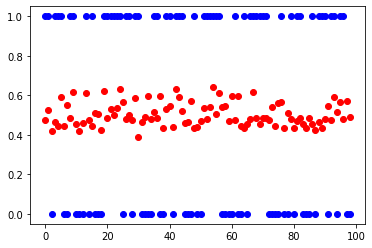

In [14]:
plt.plot(predicted_value[1:100],'ro')
plt.plot(y_test[1:100],'bo')

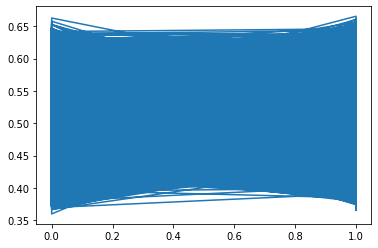

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y_test,predicted_value)